In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
%matplotlib inline


In [50]:
# Carregar os dados de exemplo
data = pd.read_excel('statusinvest-filtrada.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TICKER                 601 non-null    object 
 1   PRECO                  601 non-null    float64
 2    VALOR DE MERCADO      594 non-null    float64
 3    LPA                   601 non-null    float64
 4    VPA                   601 non-null    float64
 5   P/L                    601 non-null    float64
 6   EV/EBIT                594 non-null    float64
 7   DY                     335 non-null    float64
 8   MARGEM BRUTA           573 non-null    float64
 9   MARGEM EBIT            573 non-null    float64
 10  MARG. LIQUIDA          573 non-null    float64
 11  ROE                    597 non-null    float64
 12  ROA                    600 non-null    float64
 13  DIVIDA LIQUIDA / EBIT  544 non-null    float64
 14  LIQ. CORRENTE          566 non-null    float64
dtypes: flo

In [51]:
data.isnull().sum()/len(data) * 100

TICKER                    0.000000
PRECO                     0.000000
 VALOR DE MERCADO         1.164725
 LPA                      0.000000
 VPA                      0.000000
P/L                       0.000000
EV/EBIT                   1.164725
DY                       44.259567
MARGEM BRUTA              4.658902
MARGEM EBIT               4.658902
MARG. LIQUIDA             4.658902
ROE                       0.665557
ROA                       0.166389
DIVIDA LIQUIDA / EBIT     9.484193
LIQ. CORRENTE             5.823627
dtype: float64

In [52]:
for column in data.columns:
    # Calcular a moda da coluna
    mode_value = data[column].mode()[0]
    print(column, mode_value)
    
    # Substituir os valores NaN pela moda da coluna
    data[column].fillna(mode_value, inplace=True)

TICKER AALR3
PRECO 0.0
 VALOR DE MERCADO 0.0
 LPA 0.7
 VPA 0.0
P/L 0.0
EV/EBIT -15.46
DY 1.62
MARGEM BRUTA 100.0
MARGEM EBIT 1397.5
MARG. LIQUIDA 2207.62
ROE 4.61
ROA 2.48
DIVIDA LIQUIDA / EBIT -28.66
LIQ. CORRENTE 1.94


In [53]:
data.isnull().sum()/len(data) * 100

TICKER                   0.0
PRECO                    0.0
 VALOR DE MERCADO        0.0
 LPA                     0.0
 VPA                     0.0
P/L                      0.0
EV/EBIT                  0.0
DY                       0.0
MARGEM BRUTA             0.0
MARGEM EBIT              0.0
MARG. LIQUIDA            0.0
ROE                      0.0
ROA                      0.0
DIVIDA LIQUIDA / EBIT    0.0
LIQ. CORRENTE            0.0
dtype: float64

In [54]:
data.shape

(601, 15)

In [55]:
data.head()

,TICKER,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE
0,AALR3,22.80,2.697076e+09,-2.09,7.67,-10.90,-209.03,1.62,30.83,-1.55,-22.50,-27.28,-9.62,-50.55,0.63
1,ABCB4,16.38,3.703356e+09,3.61,23.46,4.53,3.28,6.62,32.56,26.15,18.94,15.40,1.53,-28.66,1.39
2,ABEV3,14.45,2.276429e+11,0.94,5.40,15.44,11.91,5.28,49.71,22.46,18.03,17.35,10.88,-0.48,0.99
3,ADHM3,1.56,2.543977e+07,-0.38,-1.21,-4.09,-5.69,1.62,100.00,-13548.48,-18860.61,-31.47,-2571.90,0.00,0.00
4,AERI3,1.56,1.195293e+09,-0.15,1.13,-10.29,8.56,1.62,13.11,9.22,-4.20,-13.47,-3.53,3.87,1.93


In [56]:
data.dtypes

TICKER                    object
PRECO                    float64
 VALOR DE MERCADO        float64
 LPA                     float64
 VPA                     float64
P/L                      float64
EV/EBIT                  float64
DY                       float64
MARGEM BRUTA             float64
MARGEM EBIT              float64
MARG. LIQUIDA            float64
ROE                      float64
ROA                      float64
DIVIDA LIQUIDA / EBIT    float64
LIQ. CORRENTE            float64
dtype: object

In [57]:
correlation = data.corr()
correlation

C:\Users\MessiasOliveira\AppData\Local\Temp\ipykernel_26288\3106392754.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,PRECO,VALOR DE MERCADO,LPA,VPA,P/L,EV/EBIT,DY,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,ROE,ROA,DIVIDA LIQUIDA / EBIT,LIQ. CORRENTE
PRECO,1.000000,0.044271,-0.017796,0.001890,0.287328,0.095255,-0.004711,0.009048,-0.001338,-0.002926,0.018687,0.007382,0.012607,-0.004562
VALOR DE MERCADO,0.044271,1.000000,-0.017217,-0.018594,0.024764,0.038948,0.004939,0.032355,-0.003319,-0.020206,0.028730,0.009834,-0.049164,-0.004533
LPA,-0.017796,-0.017217,1.000000,0.994867,-0.003825,-0.005118,0.007061,0.004757,0.010294,0.009028,0.004842,0.012861,-0.053673,-0.007015
VPA,0.001890,-0.018594,0.994867,1.000000,-0.003985,-0.005554,-0.003225,0.005304,0.004257,-0.001749,0.001504,0.000447,-0.058332,-0.003270
P/L,0.287328,0.024764,-0.003825,-0.003985,1.000000,0.009073,-0.004245,0.005195,0.008636,0.005580,0.041824,0.031686,-0.001239,0.022014
EV/EBIT,0.095255,0.038948,-0.005118,-0.005554,0.009073,1.000000,-0.004265,0.016540,0.057281,0.077972,0.010840,-0.161883,0.055852,-0.026912
DY,-0.004711,0.004939,0.007061,-0.003225,-0.004245,-0.004265,1.000000,0.014701,0.129129,0.093210,0.024851,0.011372,-0.000150,0.013395
MARGEM BRUTA,0.009048,0.032355,0.004757,0.005304,0.005195,0.016540,0.014701,1.000000,-0.111355,-0.154653,-0.002760,0.001096,0.102970,0.009199
MARGEM EBIT,-0.001338,-0.003319,0.010294,0.004257,0.008636,0.057281,0.129129,-0.111355,1.000000,0.725429,0.001310,0.342903,-0.065250,0.034218
MARG. LIQUIDA,-0.002926,-0.020206,0.009028,-0.001749,0.005580,0.077972,0.093210,-0.154653,0.725429,1.000000,-0.041158,0.732346,-0.005084,0.056932


<Axes: >

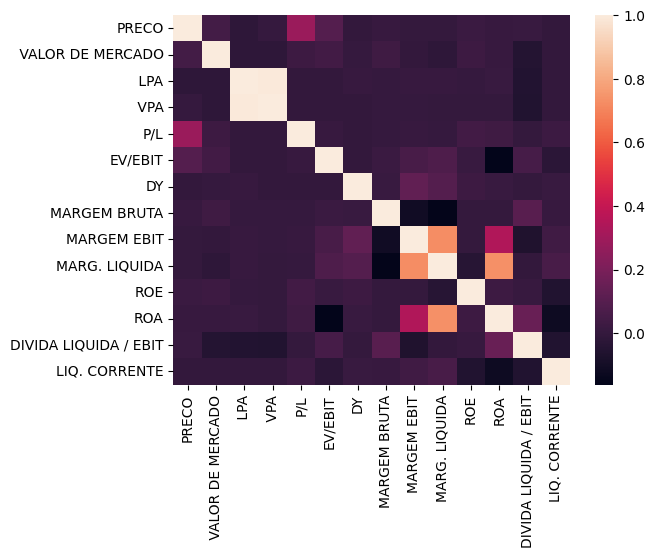

In [58]:
sns.heatmap(correlation, annot=False)

In [62]:
# Carregar os dados de exemplo
#data = pd.read_excel('BD completo.xlsx')
data = pd.read_excel('dados_filtrados.xlsx')

# Definir o dicionário de mapeamento
mapeamento = {'bom': 0, 'medio': 1, 'ruim': 2}

# Aplicar o mapeamento na coluna do dataframe
data['Situação'] = data['Situação'].map(mapeamento)

for column in data.columns:
    # Calcular a moda da coluna
    mode_value = data[column].mode()[0]
    print(column, mode_value)
    
    # Substituir os valores NaN pela moda da coluna
    data[column].fillna(mode_value, inplace=True)


print(data)


Situação 2.0
Valor de M. 67506.0
LPA 0.0
VPA 0.01
P/L -0.16
EV/EBITDA 4.81
Dividend Yield 0.46
Margem Bruta 100.0
Margem EBITDA 6.39
Margem Liquida 0.0
ROE 6.0
ROA 1.0
Div Liquida/EBITDA 0.87
Liq. Corrente 0.93
     Situação   Valor de M.    LPA    VPA    P/L  EV/EBITDA  Dividend Yield  \
0         2.0  1.334627e+09   0.57  36.03  24.71       4.81            0.85   
1         2.0  1.519060e+10   0.18   0.80  14.92       4.81           15.27   
2         2.0  9.465319e+07   0.16   2.07  31.55       4.81            2.98   
3         2.0  2.819886e+08   0.21   1.23  21.69       4.81            4.25   
4         2.0  2.887665e+08   0.60  10.42   5.65       4.81            0.46   
..        ...           ...    ...    ...    ...        ...             ...   
371       2.0  1.815159e+07 -34.50 -59.76  -0.20       4.81            0.46   
372       2.0  5.034333e+09   0.21   1.69  15.64       9.40            0.46   
373       2.0  6.750600e+04   0.00   0.01  -0.16       4.81            0.46   

In [155]:
# Aplicar o algoritmo K-means para criar os clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


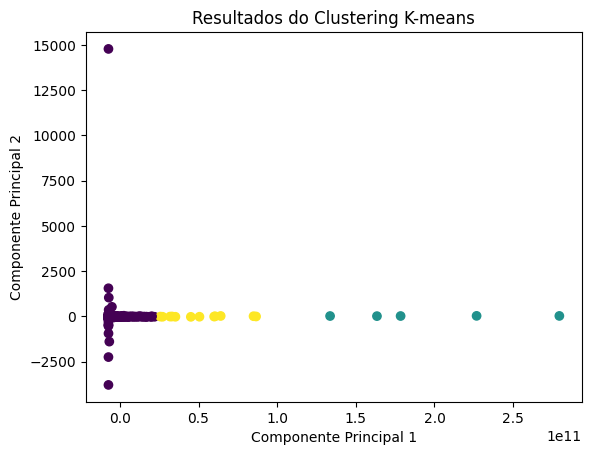

In [156]:
# Reduzir a dimensionalidade dos dados para visualização
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data)

# Plotar os pontos de dados com cores representando os clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=clusters)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados do Clustering K-means')
plt.show()

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


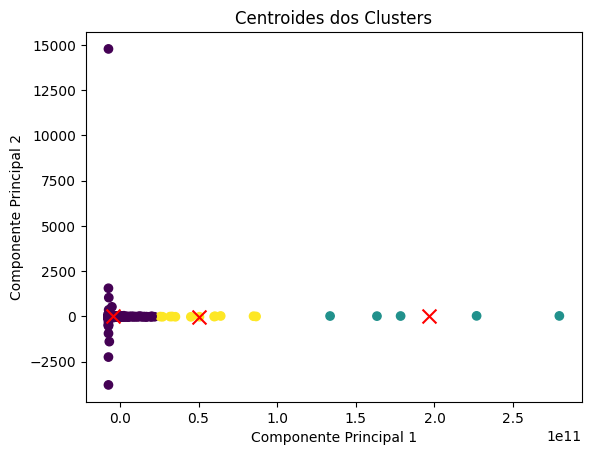

   Situação   Valor de M.       LPA       VPA       P/L  EV/EBITDA  \
0  1.754875  2.874435e+09 -7.144011  34.70415  8.930279   5.662869   
1  2.000000  2.036285e+11  1.794000  17.44200  7.686000   7.148000   
2  1.916667  5.769852e+10  1.287500  11.42000  9.809167  12.049167   

   Dividend Yield  Margem Bruta  Margem EBITDA  Margem Liquida        ROE  \
0        1.594485     84.532813     -18.452730       10.378983  16.564318   
1        2.540000     67.796000      22.658000        8.304000  17.600000   
2        3.026667     55.905000      37.051667       21.485000  24.166667   

         ROA  Div Liquida/EBITDA  Liq. Corrente  
0   3.987465            1.655515       1.872730  
1   6.800000            2.402000       1.278000  
2  10.833333            2.003500       1.476667  


In [142]:
# Analisar a interpretabilidade dos clusters
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Visualizar os centroides dos clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=clusters)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, color='red')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Centroides dos Clusters')
plt.show()

# Examinar os atributos mais importantes para cada cluster
feature_importances = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
print(feature_importances)



In [143]:
# Calcular as métricas de avaliação do clustering
silhouette_score = silhouette_score(data, clusters)
davies_bouldin_index = davies_bouldin_score(data, clusters)
print(f'Silhouette Score: {silhouette_score}')
print(f'Davies-Bouldin Index: {davies_bouldin_index}')

Silhouette Score: 0.8878866024334763
Davies-Bouldin Index: 0.4140916087741046
